In [5]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [6]:
dt=0.004
lp=1.2 #nm
Kb_T=4.10 # pN⋅nm

Funciones

In [7]:
def fuerza(x,c):
    return (Kb_T/(lp))*(0.25*(1.0-(x/c))**-2.0-0.25+(x/c))
def probabilidad_de_transicion(k,f,delta_X):
    return k*exp((delta_X*f)/(Kb_T))*dt

In [8]:
def evolucion(cambio_L):
    ka=(3.36)**2*(41) #pN/nm
    kAB=5.0e-2 #Hz
    kBA=7.0e2 #Hz
    delta_X_AB=0.5 #nm
    delta_X_BA=-0.5 #nm
    Ntot=250.0
    Na=Ntot-5
    Nb=5
    La0=0.1 #nm
    Lb0=5.0 #nm
    L_inicial=Na*La0
    L=Na*La0
    cp=zeros(4)
    longitudes=[]
    fuerzas=[]
    j=0
    while (L<=1200.0):  
        
        a=La0*Na
        b=Kb_T/(lp)
        c=Lb0*Nb
        L=L_inicial+cambio_L*dt*(j)
        longitudes.append(L-L_inicial)

        if (Na!=0):
            cp[0]=4*(Na*b+c*ka)
            cp[1]=-(c)*(8*c*ka+4*ka*(L-a)+9*Na*b)
            cp[2]=(2*c**2)*(2*c*ka+4*ka*(L-a)+3*Na*b)
            cp[3]=4*(c**3)*(ka)*(a-L)
            raices=roots(cp)
            Lb=raices[2]
            fuerzas.append(fuerza(Lb,c))
                   
        elif(Na==0):  
            fuerzas.append(fuerza(L,Ntot*Lb0))

        
        p=random.uniform(size=2)
        pb=probabilidad_de_transicion(kAB,(fuerzas[j]),delta_X_AB)
        pa=probabilidad_de_transicion(kBA,(fuerzas[j]),delta_X_BA)  
        
        if (pa>p[0]) & (Na<Ntot-5) & (Nb<5) & (Na+Nb==Ntot): 
            Na=Na+1.0
            Nb=Nb-1.0
            
        if (pb>p[1]) & (Nb<Ntot) & (Na>0) & (Na+Nb==Ntot):
            Na=Na-1.0
            Nb=Nb+1.0
        j=j+1

    respuesta=zeros((2,len(longitudes)))
    respuesta[0]=longitudes
    respuesta[1]=fuerzas
    return respuesta

In [9]:
velocidad=[0.1e3,1.0e3,5.0,0.05e3]
a1=evolucion(velocidad[0])
a2=evolucion(velocidad[1])
a3=evolucion(velocidad[2])
a4=evolucion(velocidad[3])

/Users/juandiegoarango/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:54: ComplexWarning: Casting complex values to real discards the imaginary part


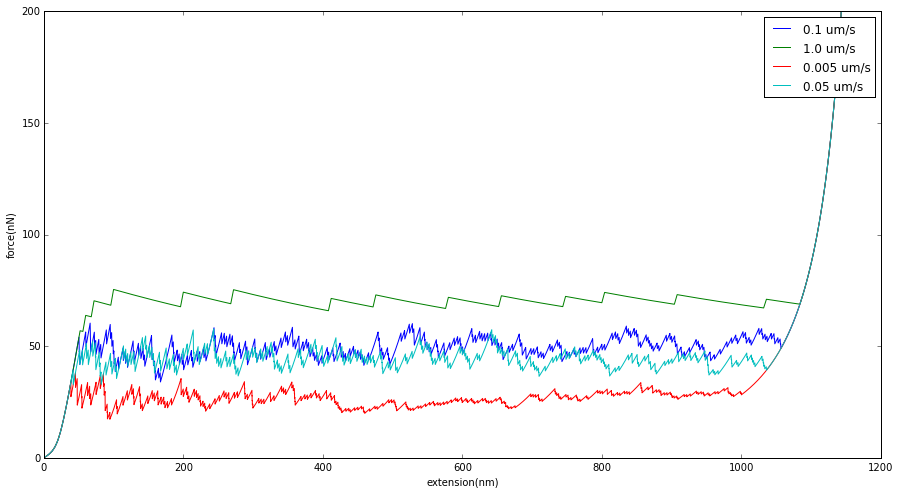

In [10]:
pylab.rcParams['figure.figsize'] = (15, 8)
plot(a1[0],a1[1],label="0.1 um/s")
plot(a2[0],a2[1],label="1.0 um/s")
plot(a3[0],a3[1],label="0.005 um/s")
plot(a4[0],a4[1],label="0.05 um/s")
plt.legend()
xlabel("extension(nm)")
ylabel("force(nN)")
xlim(0,1200)
ylim(0,200)
savefig('Pili_elongation.png')

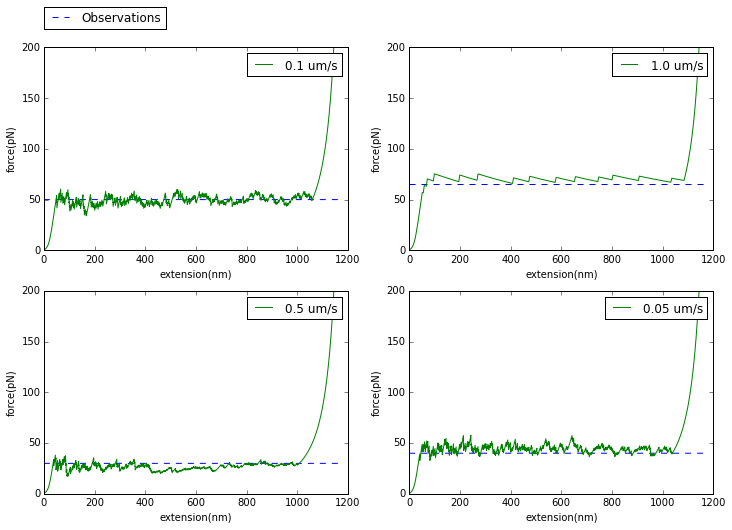

In [11]:
fuerza_validacion=[50.0,65.0,30.0,40]
pylab.rcParams['figure.figsize'] = (12, 8)

plt.figure(1)

plt.subplot(221)
line2, =plot(a1[0],fuerza_validacion[0]*ones(len(a1[0])),linestyle='--',label="Observations")
line1, =plot(a1[0],a1[1],label="0.1 um/s")
first_legend = plt.legend(handles=[line1], loc=1)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line2],bbox_to_anchor=(0.0, 1.2), loc=2, borderaxespad=0.)

xlabel("extension(nm)")
ylabel("force(pN)")
xlim(0,1200)
ylim(0,200)

plt.subplot(222)
plot(a2[0],fuerza_validacion[1]*ones(len(a2[0])),linestyle='--')
plot(a2[0],a2[1],label="1.0 um/s")
plt.legend()
xlabel("extension(nm)")
ylabel("force(pN)")
xlim(0,1200)
ylim(0,200)

plt.subplot(223)
plot(a3[0],fuerza_validacion[2]*ones(len(a3[0])),linestyle='--')
plot(a3[0],a3[1],label="0.5 um/s")
plt.legend()
xlabel("extension(nm)")
ylabel("force(pN)")
xlim(0,1200)
ylim(0,200)

plt.subplot(224)
plot(a4[0],fuerza_validacion[3]*ones(len(a4[0])),linestyle='--')
plot(a4[0],a4[1],label="0.05 um/s")
plt.legend()
xlabel("extension(nm)")
ylabel("force(pN)")
xlim(0,1200)
ylim(0,200)

savefig('grafica con validacion.png')


referencias de extension fuerza:

Andersson et al. - 2007 - The Biomechanical Properties of E. coli Pili for U